## GROUP 7
### Members


*   Ankitha Lakshmisha
*   Fenil Niteshbhai Savani
*   Sharayu Shekhar Thosar

## TASK 2


In [1]:
!pip install ordpy

In [2]:
!pip install pyentrp

In [4]:
import numpy as np
import pandas as pd
from pyentrp import entropy as ent
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ordpy

## Reading all the datasets as dataframes from 'Data' folder in the local system and saving it into two lists for chest and head

In [89]:
#Storing the common filenames in each subject folder
filenames_chest = ['acc_climbingdown_chest.csv','acc_climbingup_chest.csv',
                   'acc_running_chest.csv','acc_walking_chest.csv', ]

filenames_head = ['acc_climbingdown_head.csv','acc_climbingup_head.csv',
                  'acc_running_head.csv','acc_walking_head.csv']

#Creating a list to store subject names
subjects = ['subject' + ' ' + str(i) for i in range(1,16)]

#Storing activities as well to add a column to every dataset
activities = ['climbingdown', 'climbingup', 'running', 'walking']

#Creating empty lists
chest_dfs = []
head_dfs = []

#Iterating through every subject folder and then through every file and reading it.
#After reading the file and saving it into dataframe, columns Subject and Activity are added to the dataframe.
#Same process repeated for head and chest.
for subject in subjects:
    for filename in filenames_chest:
        path = os.path.join('Data',subject, filename)
        for activity in activities:
            if activity in path:
                #print(path)
                chest_df = pd.read_csv(path, index_col= 'id')
                chest_df['Subject'] = subject.split(' ')[1]
                chest_df['Activity'] = activity
                chest_dfs.append(chest_df)
                
    for filename in filenames_head:
        path = os.path.join('Data',subject, filename)
        for activity in activities:
            if activity in path:
                head_df = pd.read_csv(path, index_col= 'id')
                head_df['Subject'] = subject.split(' ')[1]
                head_df['Activity'] = activity
                head_dfs.append(head_df)

## Calculating complexity and permutation entropy for all chest datasets and combining it into a dataframe

In [8]:
#Creating an empty dataframe to store all chest data
chest_data = pd.DataFrame()

signal_length = [1024,2048,4096]
dimension = [3,4,5,6]
delay = [1,2,3]
axis_names = ['attr_x','attr_y','attr_z']

#Iterating through every chest datasets, doing the calculations and concatenating it to the chest_data
for df in chest_dfs:
    for axis in axis_names:
        for s_len in signal_length:
            df = df[0:s_len]
            for embd_dim in dimension: 
                for tau in delay:
                    axis_pe, axis_complexity = ordpy.complexity_entropy(df[axis], dx=embd_dim, taux=tau)
                    chest_dict = {'Subject' : df['Subject'].unique()[0],'Accelerometer axis': axis,
                                  'Signal length':s_len, 'Dimension on':embd_dim, 'Delay':tau,
                                  'Permutation Entropy': axis_pe, 'Complexity': axis_complexity,
                                  'Activity': df['Activity'].unique()[0]}
                    df_dictionary = pd.DataFrame([chest_dict])
                    chest_data = pd.concat([chest_data, df_dictionary], ignore_index=True)
                
   

## Calculating complexity and permutation entropy for all head datasets and combining it into a dataframe

In [9]:
#Creating an empty dataframe to store all head data
head_data = pd.DataFrame()

signal_length = [1024,2048,4096]
dimension = [3,4,5,6]
delay = [1,2,3]
axis_names = ['attr_x','attr_y','attr_z']

#Iterating through every chest datasets, doing the calculations and concatenating it to the head_data
for df in head_dfs:
    for axis in axis_names:
        for s_len in signal_length:
            df = df[0:s_len]
            for embd_dim in dimension: 
                for tau in delay:
                    axis_pe, axis_complexity = ordpy.complexity_entropy(df[axis], dx=embd_dim, taux=tau)
                    head_dict = {'Subject' : df['Subject'].unique()[0],'Accelerometer axis': axis,
                                  'Signal length':s_len, 'Dimension on':embd_dim, 'Delay':tau,
                                  'Permutation Entropy': axis_pe, 'Complexity': axis_complexity,
                                  'Activity': df['Activity'].unique()[0]}
                    df_dictionary = pd.DataFrame([head_dict])
                    head_data = pd.concat([head_data, df_dictionary], ignore_index=True)
                

# Final Chest Dataset

In [10]:
chest_data['Accelerometer axis'] = chest_data['Accelerometer axis'].map({"attr_x":'x','attr_y':'y','attr_z':'z'})

In [87]:
chest_data

,Subject,Accelerometer axis,Signal length,Dimension on,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.865585,0.112619,climbingdown
1,1,x,1024,3,2,0.960464,0.036433,climbingdown
2,1,x,1024,3,3,0.985454,0.013861,climbingdown
3,1,x,1024,4,1,0.808446,0.187779,climbingdown
4,1,x,1024,4,2,0.937031,0.073560,climbingdown
...,...,...,...,...,...,...,...,...
6475,15,z,4096,5,2,0.919208,0.137694,walking
6476,15,z,4096,5,3,0.959984,0.070839,walking
6477,15,z,4096,6,1,0.740326,0.401931,walking
6478,15,z,4096,6,2,0.871989,0.287190,walking


# Final Head Dataset

In [12]:
head_data['Accelerometer axis'] = head_data['Accelerometer axis'].map({"attr_x":'x','attr_y':'y','attr_z':'z'})

In [13]:
head_data

,Subject,Accelerometer axis,Signal length,Dimension on,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.859282,0.117177,climbingdown
1,1,x,1024,3,2,0.945877,0.049096,climbingdown
2,1,x,1024,3,3,0.976477,0.021966,climbingdown
3,1,x,1024,4,1,0.801931,0.185327,climbingdown
4,1,x,1024,4,2,0.912548,0.104322,climbingdown
...,...,...,...,...,...,...,...,...
6475,15,z,4096,5,2,0.838532,0.230712,walking
6476,15,z,4096,5,3,0.918550,0.132350,walking
6477,15,z,4096,6,1,0.709921,0.402486,walking
6478,15,z,4096,6,2,0.794801,0.369925,walking


# Plots for Running and Walking

In [14]:
#Filtering data for generating scatter plot for running and walking
chest_data1 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==3) &
                         (chest_data['Accelerometer axis']=='x') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data1 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==3) &
                          (head_data['Accelerometer axis']=='x') &
                          (head_data['Activity'].isin(['walking','running']))]

In [15]:
chest_data1.reset_index(inplace=True)
head_data1.reset_index(inplace=True)

Text(0.5, 1.0, 'Plot for Head')

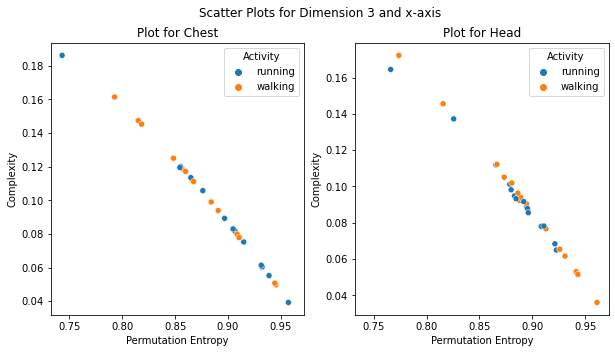

In [21]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 3 and x-axis')
sns.scatterplot(ax=axes[0], x=chest_data1['Permutation Entropy'], 
                y=chest_data1['Complexity'],hue= chest_data1['Activity'])
axes[0].set_title('Plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data1['Permutation Entropy'],
                y=head_data1['Complexity'],hue= head_data1['Activity'])
axes[1].set_title('Plot for Head')

In [24]:
#Filtering data for generating scatter plot for running and walking
chest_data2 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==3) &
                         (chest_data['Accelerometer axis']=='y') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data2 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==3) &
                          (head_data['Accelerometer axis']=='y') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

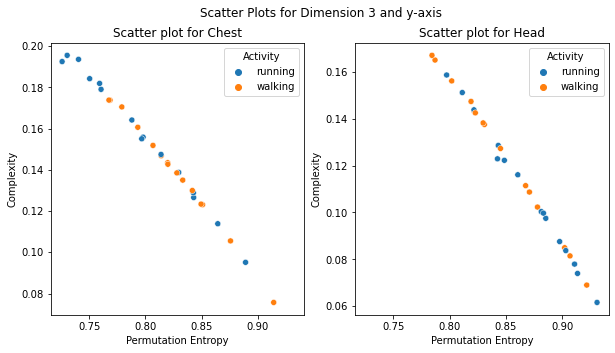

In [27]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 3 and y-axis')
             
sns.scatterplot(ax=axes[0], x=chest_data2['Permutation Entropy'],
                y=chest_data2['Complexity'],hue= chest_data2['Activity'])      
axes[0].set_title('Scatter plot for Chest')
             
sns.scatterplot(ax=axes[1], x=head_data2['Permutation Entropy'], 
                y=head_data2['Complexity'],hue= head_data2['Activity'])
axes[1].set_title('Scatter plot for Head')

In [29]:
#Filtering data for generating scatter plot for running and walking
chest_data3 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==3) &
                         (chest_data['Accelerometer axis']=='z') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data3 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==3) &
                          (head_data['Accelerometer axis']=='z') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

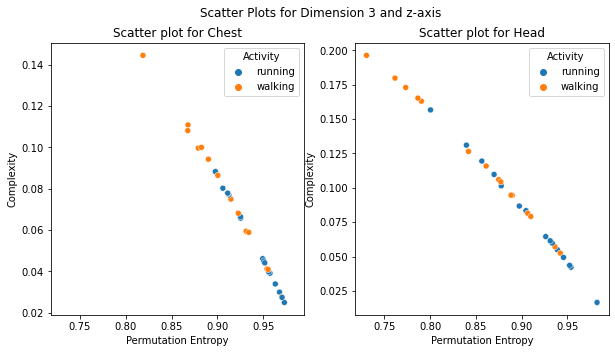

In [31]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 3 and z-axis')
sns.scatterplot(ax=axes[0], x=chest_data3['Permutation Entropy'], 
                y=chest_data3['Complexity'],hue= chest_data3['Activity'])

axes[0].set_title('Scatter plot for Chest')
sns.scatterplot(ax=axes[1], x=head_data3['Permutation Entropy'], 
                y=head_data3['Complexity'],hue= head_data3['Activity'])
axes[1].set_title('Scatter plot for Head')

In [32]:
#Filtering data for generating scatter plot for running and walking
chest_data4 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==4) &
                         (chest_data['Accelerometer axis']=='x') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data4 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==4) &
                          (head_data['Accelerometer axis']=='x') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

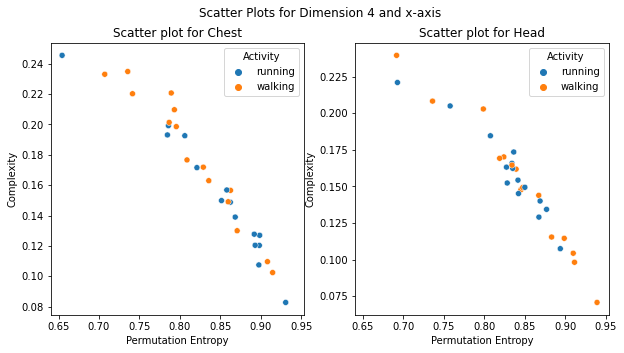

In [33]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 4 and x-axis')
sns.scatterplot(ax=axes[0], x=chest_data4['Permutation Entropy'],
                y=chest_data4['Complexity'],hue= chest_data4['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data4['Permutation Entropy'], 
                y=head_data4['Complexity'],hue= head_data4['Activity'])
axes[1].set_title('Scatter plot for Head')

In [35]:
#Filtering data for generating scatter plot for running and walking
chest_data5 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==4) &
                         (chest_data['Accelerometer axis']=='y') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data5 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==4) &
                          (head_data['Accelerometer axis']=='y') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

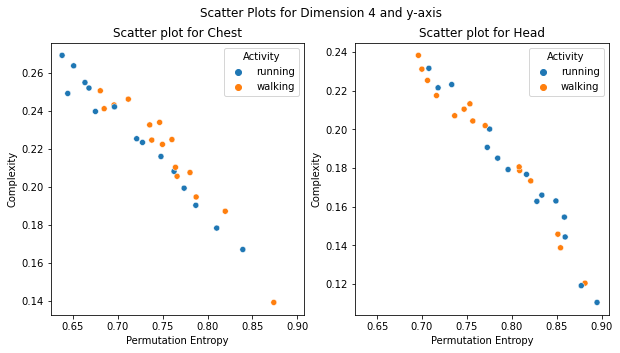

In [36]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 4 and y-axis')
sns.scatterplot(ax=axes[0], x=chest_data5['Permutation Entropy'],
                y=chest_data5['Complexity'],hue= chest_data5['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data5['Permutation Entropy'], 
                y=head_data5['Complexity'],hue= head_data5['Activity'])
axes[1].set_title('Scatter plot for Head')

In [37]:
#Filtering data for generating scatter plot for running and walking
chest_data6 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==4) &
                         (chest_data['Accelerometer axis']=='z') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data6 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==4) &
                          (head_data['Accelerometer axis']=='z') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

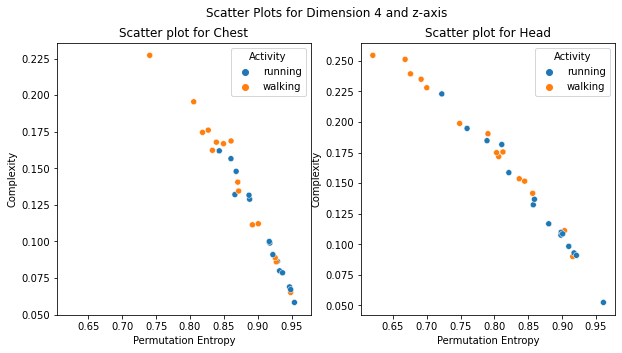

In [38]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 4 and z-axis')
sns.scatterplot(ax=axes[0], x=chest_data6['Permutation Entropy'],
                y=chest_data6['Complexity'],hue= chest_data6['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data6['Permutation Entropy'],
                y=head_data6['Complexity'],hue= head_data6['Activity'])
axes[1].set_title('Scatter plot for Head')

In [39]:
#Filtering data for generating scatter plot for running and walking
chest_data7 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==5) &
                         (chest_data['Accelerometer axis']=='x') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data7 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==5) &
                          (head_data['Accelerometer axis']=='x') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

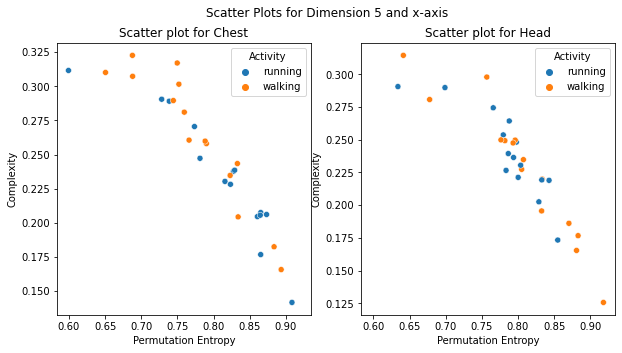

In [40]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 5 and x-axis')
sns.scatterplot(ax=axes[0], x=chest_data7['Permutation Entropy'], 
                y=chest_data7['Complexity'],hue= chest_data7['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data7['Permutation Entropy'], 
                y=head_data7['Complexity'],hue= head_data7['Activity'])

axes[1].set_title('Scatter plot for Head')

In [41]:
#Filtering data for generating scatter plot for running and walking
chest_data8 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==5) &
                         (chest_data['Accelerometer axis']=='y') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data8 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==5) &
                          (head_data['Accelerometer axis']=='y') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

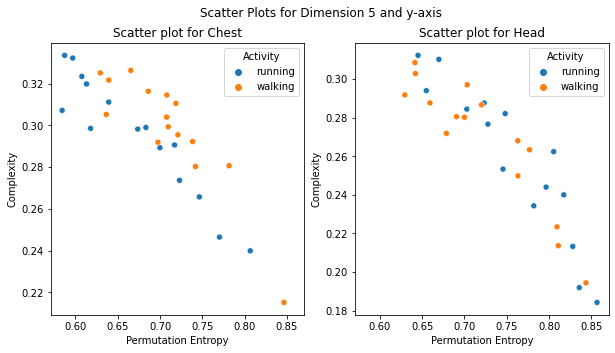

In [44]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 5 and y-axis')
sns.scatterplot(ax=axes[0], x=chest_data8['Permutation Entropy'],
                y=chest_data8['Complexity'],hue= chest_data8['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data8['Permutation Entropy'],
                y=head_data8['Complexity'],hue= head_data8['Activity'])
axes[1].set_title('Scatter plot for Head')

In [45]:
#Filtering data for generating scatter plot for running and walking
chest_data9 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==5) &
                         (chest_data['Accelerometer axis']=='z') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data9 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==5) &
                          (head_data['Accelerometer axis']=='z') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

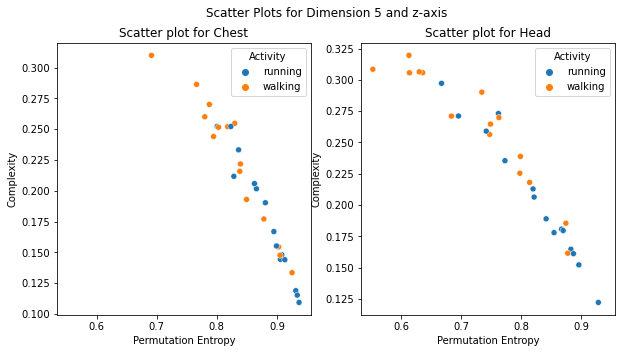

In [46]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 5 and z-axis')
sns.scatterplot(ax=axes[0], x=chest_data9['Permutation Entropy'],
                y=chest_data9['Complexity'],hue= chest_data9['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data9['Permutation Entropy'],
                y=head_data9['Complexity'],hue= head_data9['Activity'])
axes[1].set_title('Scatter plot for Head')

In [47]:
#Filtering data for generating scatter plot for running and walking
chest_data10 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==6) &
                         (chest_data['Accelerometer axis']=='x') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data10 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==6) &
                          (head_data['Accelerometer axis']=='x') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

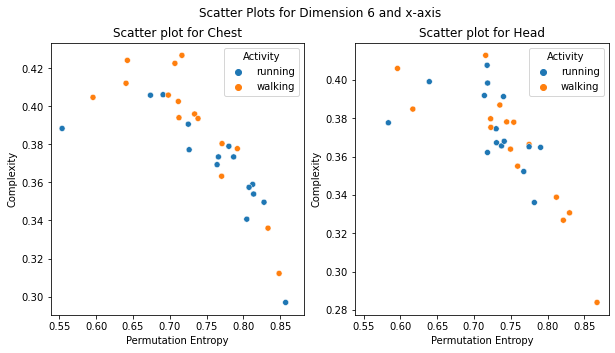

In [48]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 6 and x-axis')

sns.scatterplot(ax=axes[0], x=chest_data10['Permutation Entropy'],
                y=chest_data10['Complexity'],hue= chest_data10['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data10['Permutation Entropy'],
                y=head_data10['Complexity'],hue= head_data10['Activity'])
axes[1].set_title('Scatter plot for Head')

In [49]:
#Filtering data for generating scatter plot for running and walking
chest_data11 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==6) &
                         (chest_data['Accelerometer axis']=='y') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data11 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==6) &
                          (head_data['Accelerometer axis']=='y') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

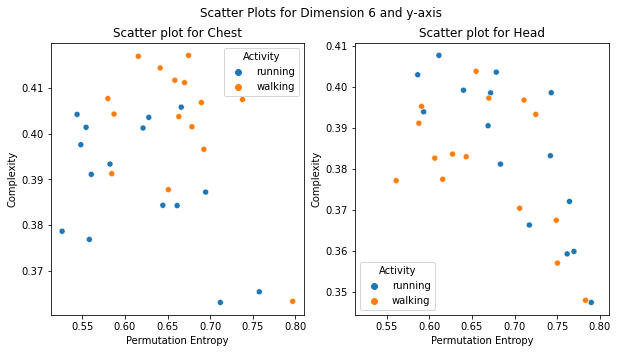

In [50]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 6 and y-axis')
sns.scatterplot(ax=axes[0], x=chest_data11['Permutation Entropy'],
                y=chest_data11['Complexity'],hue= chest_data11['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data11['Permutation Entropy'],
                y=head_data11['Complexity'],hue= head_data11['Activity'])
axes[1].set_title('Scatter plot for Head')

In [52]:
#Filtering data for generating scatter plot for running and walking
chest_data12 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                         (chest_data['Dimension on']==6) &
                         (chest_data['Accelerometer axis']=='z') &
                         (chest_data['Activity'].isin(['walking','running']))]

head_data12 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==6) &
                          (head_data['Accelerometer axis']=='z') &
                          (head_data['Activity'].isin(['walking','running']))]

Text(0.5, 1.0, 'Scatter plot for Head')

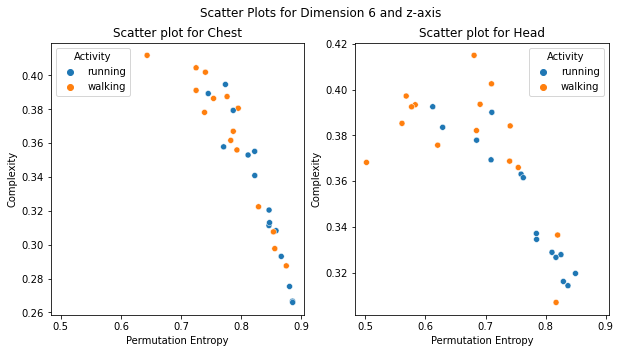

In [53]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 6 and z-axis')
sns.scatterplot(ax=axes[0], x=chest_data12['Permutation Entropy'],
                y=chest_data12['Complexity'],hue= chest_data12['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data12['Permutation Entropy'],
                y=head_data12['Complexity'],hue= head_data12['Activity'])
axes[1].set_title('Scatter plot for Head')

# Plots for Climbing up and Climbing Down

In [85]:
chest_data13 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==3) &
                          (chest_data['Accelerometer axis']=='x') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data13 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==3) &
                          (head_data['Accelerometer axis']=='x') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

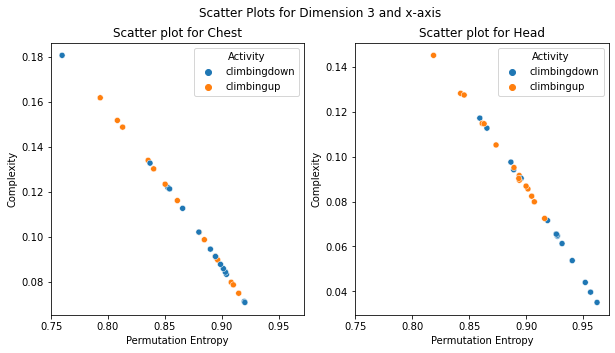

In [86]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 3 and x-axis')
sns.scatterplot(ax=axes[0], x=chest_data13['Permutation Entropy'],
                y=chest_data13['Complexity'],hue= chest_data13['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data13['Permutation Entropy'], 
                y=head_data13['Complexity'],hue= head_data13['Activity'])
axes[1].set_title('Scatter plot for Head')

In [83]:
chest_data14 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==3) &
                          (chest_data['Accelerometer axis']=='y') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data14 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==3) &
                          (head_data['Accelerometer axis']=='y') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

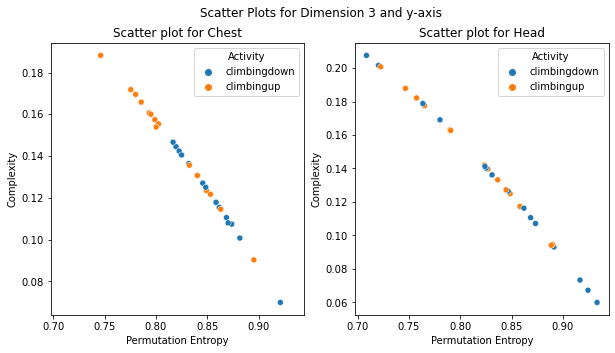

In [84]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 3 and y-axis')
sns.scatterplot(ax=axes[0], x=chest_data14['Permutation Entropy'], 
                y=chest_data14['Complexity'],hue= chest_data14['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data14['Permutation Entropy'], 
                y=head_data14['Complexity'],hue= head_data14['Activity'])
axes[1].set_title('Scatter plot for Head')

In [81]:
chest_data15 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==3) &
                          (chest_data['Accelerometer axis']=='z') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data15 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==3) &
                          (head_data['Accelerometer axis']=='z') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

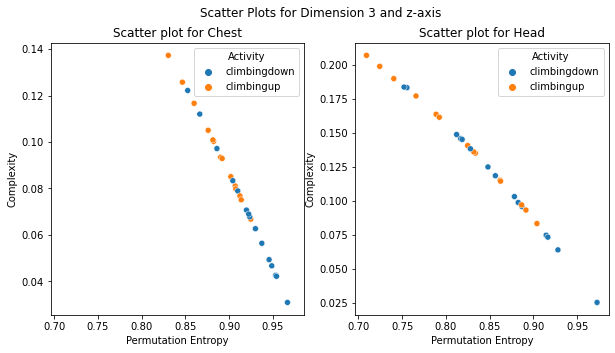

In [82]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 3 and z-axis')
sns.scatterplot(ax=axes[0], x=chest_data15['Permutation Entropy'], 
                y=chest_data15['Complexity'],hue= chest_data15['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data15['Permutation Entropy'], 
                y=head_data15['Complexity'],hue= head_data15['Activity'])
axes[1].set_title('Scatter plot for Head')

In [78]:
chest_data16 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==4) &
                          (chest_data['Accelerometer axis']=='x') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data16 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==4) &
                          (head_data['Accelerometer axis']=='x') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

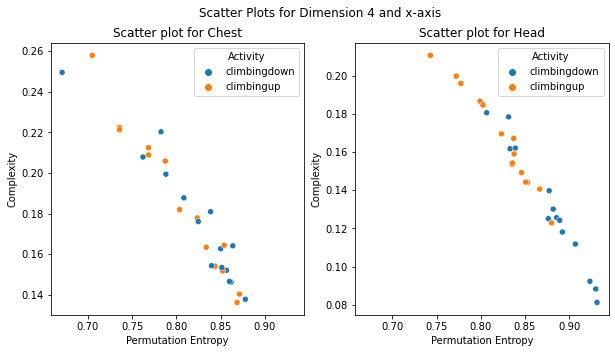

In [79]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 4 and x-axis')

sns.scatterplot(ax=axes[0], x=chest_data16['Permutation Entropy'], 
                y=chest_data16['Complexity'],hue= chest_data16['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data16['Permutation Entropy'],
                y=head_data16['Complexity'],hue= head_data16['Activity'])
axes[1].set_title('Scatter plot for Head')

In [74]:
chest_data17 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==4) &
                          (chest_data['Accelerometer axis']=='y') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data17 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==4) &
                          (head_data['Accelerometer axis']=='y') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

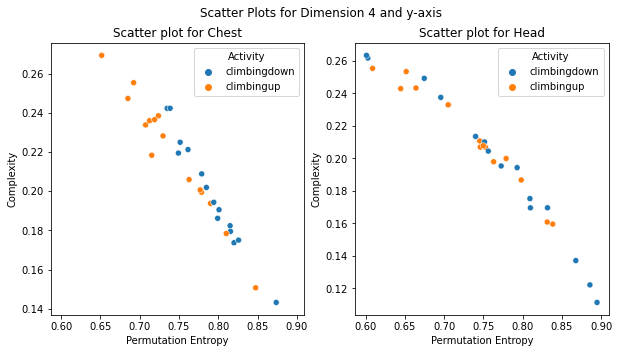

In [76]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 4 and y-axis')

sns.scatterplot(ax=axes[0], x=chest_data17['Permutation Entropy'],
                y=chest_data17['Complexity'],hue= chest_data17['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data17['Permutation Entropy'], 
                y=head_data17['Complexity'],hue= head_data17['Activity'])
axes[1].set_title('Scatter plot for Head')

In [71]:
chest_data18 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==4) &
                          (chest_data['Accelerometer axis']=='z') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data18 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==4) &
                          (head_data['Accelerometer axis']=='z') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

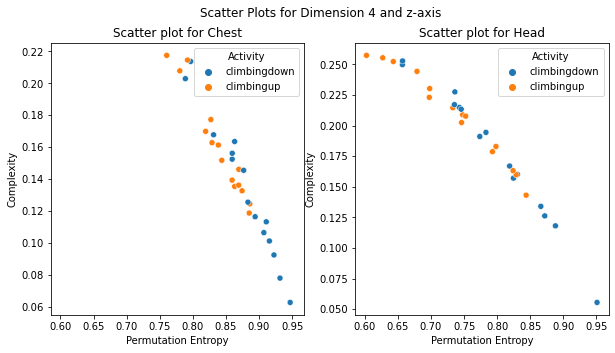

In [72]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 4 and z-axis')
sns.scatterplot(ax=axes[0], x=chest_data18['Permutation Entropy'],
                y=chest_data18['Complexity'],hue= chest_data18['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data18['Permutation Entropy'], 
                y=head_data18['Complexity'],hue= head_data18['Activity'])
axes[1].set_title('Scatter plot for Head')

In [69]:
chest_data19 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==5) &
                          (chest_data['Accelerometer axis']=='x') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data19 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==5) &
                          (head_data['Accelerometer axis']=='x') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

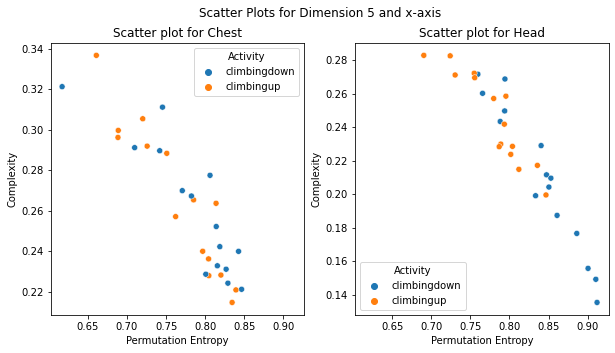

In [70]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 5 and x-axis')
sns.scatterplot(ax=axes[0], x=chest_data19['Permutation Entropy'], 
                y=chest_data19['Complexity'],hue= chest_data19['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data19['Permutation Entropy'], 
                y=head_data19['Complexity'],hue= head_data19['Activity'])
axes[1].set_title('Scatter plot for Head')

In [67]:
chest_data20 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==5) &
                          (chest_data['Accelerometer axis']=='y') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data20 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==5) &
                          (head_data['Accelerometer axis']=='y') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

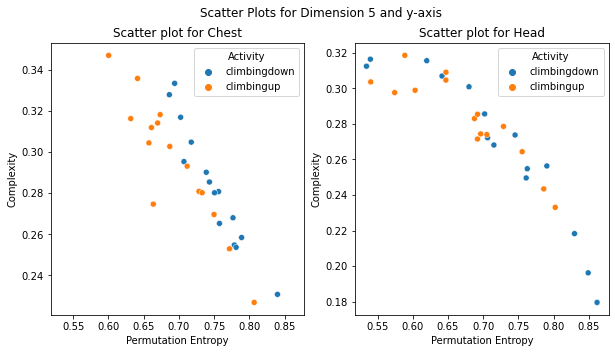

In [68]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 5 and y-axis')
sns.scatterplot(ax=axes[0], x=chest_data20['Permutation Entropy'],
                y=chest_data20['Complexity'],hue= chest_data20['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data20['Permutation Entropy'], 
                y=head_data20['Complexity'],hue= head_data20['Activity'])
axes[1].set_title('Scatter plot for Head')

In [64]:
chest_data21 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==5) &
                          (chest_data['Accelerometer axis']=='z') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data21 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==5) &
                          (head_data['Accelerometer axis']=='z') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

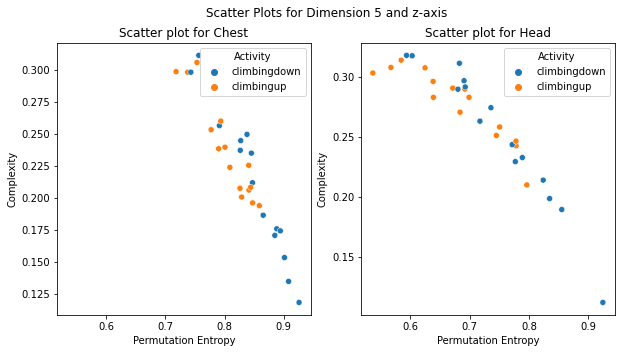

In [65]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 5 and z-axis')
sns.scatterplot(ax=axes[0], x=chest_data21['Permutation Entropy'], 
                y=chest_data21['Complexity'],hue= chest_data21['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data21['Permutation Entropy'],
                y=head_data21['Complexity'],hue= head_data21['Activity'])
axes[1].set_title('Scatter plot for Head')

In [61]:
chest_data22 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==6) &
                          (chest_data['Accelerometer axis']=='x') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data22 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==6) &
                          (head_data['Accelerometer axis']=='x') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

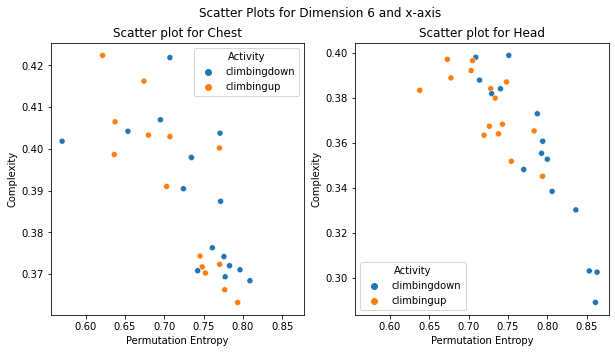

In [62]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 6 and x-axis')

sns.scatterplot(ax=axes[0], x=chest_data22['Permutation Entropy'],
                y=chest_data22['Complexity'],hue= chest_data22['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data22['Permutation Entropy'],
                y=head_data22['Complexity'],hue= head_data22['Activity'])
axes[1].set_title('Scatter plot for Head')

In [59]:
chest_data23 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==6) &
                          (chest_data['Accelerometer axis']=='y') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data23 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==6) &
                          (head_data['Accelerometer axis']=='y') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

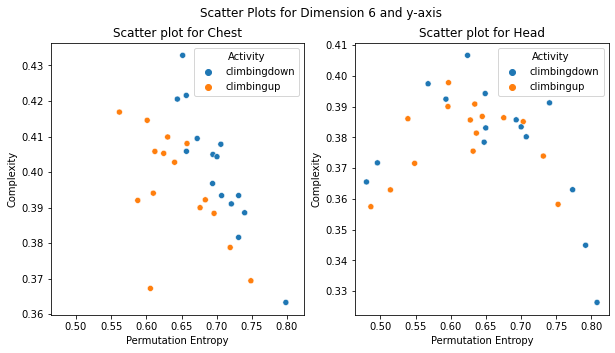

In [60]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 6 and y-axis')
sns.scatterplot(ax=axes[0], x=chest_data23['Permutation Entropy'],
                y=chest_data23['Complexity'],hue= chest_data23['Activity'])
axes[0].set_title('Scatter plot for Chest')

sns.scatterplot(ax=axes[1], x=head_data23['Permutation Entropy'],
                y=head_data23['Complexity'],hue= head_data23['Activity'])
axes[1].set_title('Scatter plot for Head')

In [56]:
chest_data24 = chest_data[(chest_data['Signal length']==4096) &
                         (chest_data['Delay']==1) & 
                          (chest_data['Dimension on']==6) &
                          (chest_data['Accelerometer axis']=='z') &
                          (chest_data['Activity'].isin(['climbingup','climbingdown']))]

head_data24 = head_data[(head_data['Signal length']==4096) &
                         (head_data['Delay']==1) & 
                          (head_data['Dimension on']==6) &
                          (head_data['Accelerometer axis']=='z') &
                          (head_data['Activity'].isin(['climbingup','climbingdown']))]

Text(0.5, 1.0, 'Scatter plot for Head')

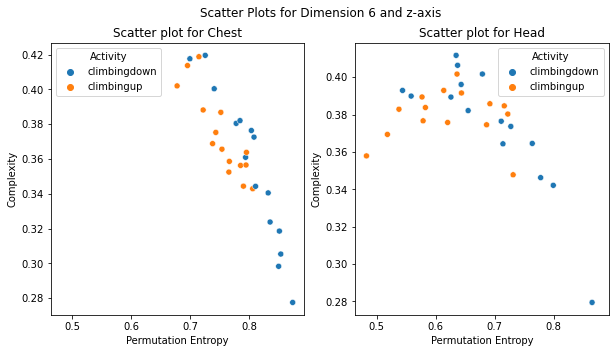

In [57]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Scatter Plots for Dimension 6 and z-axis')

sns.scatterplot(ax=axes[0], x=chest_data24['Permutation Entropy'],
                y=chest_data24['Complexity'],hue= chest_data24['Activity'])
axes[0].set_title('Scatter plot for Chest')
sns.scatterplot(ax=axes[1], x=head_data24['Permutation Entropy'],
                y=head_data24['Complexity'],hue= head_data24['Activity'])
axes[1].set_title('Scatter plot for Head')